# 泰坦尼克号

## 题目及要求

- 目标  
    预测是乘客是否幸存下来  
    对于测试集中的每个PassengerId，须预测Survived变量的值 0或1。  

- 提交文件格式  
    你应该提交一个csv文件，有418个条目和一个标题行。如果您有额外的列（超出PassengerId和Survived）或行，您的提交将显示错误。  
- 该文件应该有2列：  
    PassengerId（按任意顺序排序）  
    生存（包含你的二元预测：1存活，0死亡）  

|PassengerId|Survived|
|:-:|:-:|
|892|0|
|893|1|
|894|0|


## 分析

- 解决方案的七个目标：
    - 分类。我们可能想对我们的样本进行分类或分类。我们也可能想要了解不同课程与解决方案目标的含义或相关性。
    - 相关。可以根据训练数据集中可用的特征来处理问题。数据集中的哪些功能对我们的解决方案目标有重大贡献？统计学上讲，功能和解决方案目标之间有相关性吗？随着特征值的变化，解决方案状态也会发生变化，反之亦然？这可以针对给定数据集中的数字和分类特征进行测试。我们也可能想要确定以后的目标和工作流程阶段的生存以外的特征之间的相关性。关联某些功能可能有助于创建，完成或更正功能。
    - 转换。对于建模阶段，需要准备数据。根据模型算法的选择，可能需要将所有特征转换为数值等价值。因此，例如将文本分类值转换为数字值。
    - 完成。数据准备也可能要求我们估计特征中的任何缺失值。当没有缺失值时，模型算法可能效果最好。
    - 纠正。我们还可以分析给定的训练数据集以查找特征内的错误或可能的非侵入性值，并尝试对这些值进行校正或排除包含错误的样本。一种方法是检测样本或特征中的任何异常值。如果某项功能对分析没有贡献，或者可能会显着影响结果，我们也可能会完全放弃该功能。
    - 创建。我们是否可以基于现有功能或一组功能创建新功能，以便新功能遵循相关性，转换和完整性目标。
    - 图表。如何根据数据的性质和解决方案目标来选择正确的可视化图表和图表。

In [1]:

import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
print "文件目录：", os.listdir("./input")
import pandas

train_df = pd.read_csv("./input/train.csv")
test_df = pd.read_csv("./input/test.csv")
combine = [train_df, test_df]
train_df.head(8)

文件目录： ['gender_submission.csv', 'test.csv', 'train.csv']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


- <font color=0000ff>各变量意义：</font>  

In [3]:
print train_df.columns.values

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


|Variable|Definition|Key|
|:-:|:-:|:-:|
|survival|生存|0 = No, 1 = Yes
|pclass|票类|1 = 1st, 2 = 2nd, 3 = 3rd
|sex|性别| |
|Age|年龄| |
|sibsp|＃泰坦尼克号上的兄弟姐妹/配偶|	|
|parch|泰坦尼克号上的父母/孩子的数量|	|
|ticket|票号|	|
|fare|乘客票价|	|
|cabin|客舱号码|	|
|embarked|登船港口|C = Cherbourg, Q = Queenstown, S = Southampton|

- <font color=0000ff>统计训练数据中空元素的个数</font>

In [5]:
print train_df.isnull().sum()
print '-'*40
print test_df.info()#查看每列数据类型以及nan情况

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 姓名在整个数据集中是唯一的（count = unique = 891）
- 性别为65％男性（top = male，freq = 577 / count = 891）
- 客舱值在整个样本中有多处重复。可能几个乘客共享一个小屋。 
- Embarked(登船港口)有三个可能的价值。大多数乘客是S（top= S）
- 船票特征具有较高比例（22％）的重复值（unique= 681）

- “泰坦尼克号”（总人数2,224）的存活为891或40％。
- 存活是一个 0 1值的 分类特征。
- 大约38％的样本在32％的实际存活率的中存活下来。
- 大多数乘客（> 75％）不与父母或小孩一起旅行。
- 接近30％的乘客有兄弟姐妹和/或配偶。
- 少数乘客（<1％）的票价差别很大，最高达512美元。
- 少数年龄在65-80岁之间的老年乘客（<1％）。

In [7]:
train_df.describe(include=['O']) #train_df.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


基于数据分析的假设，以下**假设**:
- 相关 
    - 想知道每个功能与Survival的关联程度如何。希望在项目早期就做到这一点，并在项目后期将这些快速关联与模型化关联进行匹配。 
- 完成 
    - 希望完成Age特征，因为它与生存密切相关。 
    - 想要完成“Embarked ”特征，因为它可能与生存或其他重要功能相关。 
- 纠正 
    - Ticket特征可能会从我们的分析中删除，因为它包含较高的重复比率（22％），并且票务和生存之间可能没有关联。 
    - Cabin特征可能因为不完整 在训练和测试数据集中包含许多空值而丢弃。 
    - PassengerId可能会从训练数据集中删除，因为它无助于生存。 
    - Name特征比较不规范，可能不直接影响生存，所以可能会扔掉。
- 创建 
    - 可能希望创建一个基于Parch和SibSp的Family的新特征，以获取船上家庭成员的总数。 
    - 可能需要设计Name特征以将标题提取为新特征。 
    - 可能想为年龄段创建新特征。这将连续的数字特征转变为序数分类特征。 
    - 可能还想创建票价范围特征。 
- 分类 
    我们也可以根据前面提到的问题描述增加我们的假设。 
    - 女性（性别=女性）更有可能幸存下来。 
    - 儿童（年龄<？）更有可能幸存下来。 
    - 上层乘客（Pclass = 1）更有可能幸存下来。    

- 通过旋转特征进行分析  
    为了确认一些观察结果和假设，可以通过相互调整特征来快速分析特征相关性。只能在这个阶段为没有任何空值的特征这样做。仅对于类别（性别），序数（Pclass）或离散（SibSp，Parch）类型的特征才有意义。 
    - Pclass  观察到Pclass = 1和Survived（分类3）之间的显着相关性（> 0.5）。决定将此特征包含在我们的模型中。 
    - 性在性别=女性在74％（分类1）有非常高的生存率。 
    - SibSp和Parch这些功能对某些值具有零关联。从这些单独的特征（创建1）派生一个特征或一组特征可能是最好的。

In [8]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)#按pclass聚合

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## 可视化

- 数值特征和生存之间的相关性 
    - 直方图可用于分析Age等连续数值变量，其中band或range可帮助识别有用模式。直方图可以使用自动定义的分箱或等分范围的分段来指示样本的分布。这有助于回答与特定条带相关的问题（婴儿有更好的存活率吗？）
    - 注意，历史图表中的x轴表示样本或乘客的数量
- 观察  
    - 婴儿（年龄<= 4）存活率高。 
    - 年龄最大的乘客（年龄= 80）幸存下来。 
    - 15-25岁的大批人没有生存。 
    - 大多数乘客都在15-35岁年龄段。 
- 决定。 
    - 这个简单的分析确认了我们的假设，作为后续工作流程阶段的决策。 
    - 应该在模型训练中考虑Age（我们的假设分类2）。 
    - 完成空值的年龄功能（完成1）。 
    - 应该组合年龄组（创建3个）。    

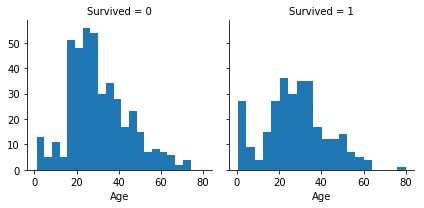

In [12]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)#bin越大 分的越细

- 关联数字和序数特征
- 可以组合多个特征来使用单个图来识别关联。这可以通过具有数字值的数字和分类特征来完成。 
- 观察。 
    - Pclass = 3拥有最多的乘客，但是大多数乘客没有生存。确认我们的分类假设2. 
    - Pclass = 2和Pclass = 3中的**婴儿**乘客大多存活。进一步验证我们的分类假设2. 
    - Pclass = 1中的大多数乘客幸存下来。确认我们的分类假设3. 
    - Pclass根据乘客的年龄分布而变化。 
- 决定。 
    - 考虑用于模型训练的Pclass。

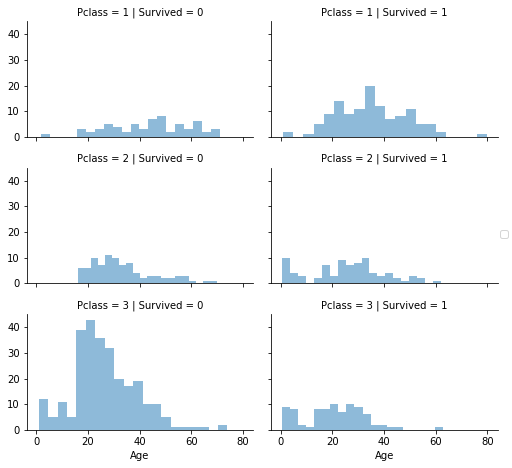

In [13]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

- 关联分类特征
    可以将分类特征与求解的目标相关联。 
- 观察。 
    - 女乘客的生存率比男性好得多。确认分类（1）。 
    - 在Embarked = C的例外，其中男性的成活率较高。这可能是Pclass和Embarked之间的相关性，而Pclass和Survived之间的相关性，并不一定是 Embarked 和Survived 之间的直接相关性。与C和Q港的Pclass = 2相比，
    - Pclass = 3时，男性的生存率更高。完成（2）。 
    - 登机口岸的Pclass = 3和男性乘客的生存率不同。相关（1）。 
- 决定。 
    - 添加性别特征模型训练。 
    - 完成并添加Embarked特征以模拟培训。

D:\Program Files\Anaconda3\envs\py27\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Program Files\Anaconda3\envs\py27\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


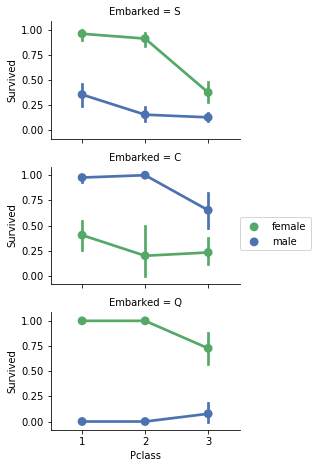

In [14]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

- 关联分类特征和数字特征
    我们也可能希望关联分类特征（非数字值）和数字特征。我们可以考虑将已Embarked（分类非数字），性别（分类非数字），票价（数字连续）与生存（分类数字）相关联。 
- 观察。 
    - 票价较高的乘客有更好的生存。证实我们对创建（4）票价范围的假设。 
    - 登船港与生存率相关。确认关联（1）和完成（2）。 
- 决定。 
    - 考虑绑定票价功能。

D:\Program Files\Anaconda3\envs\py27\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


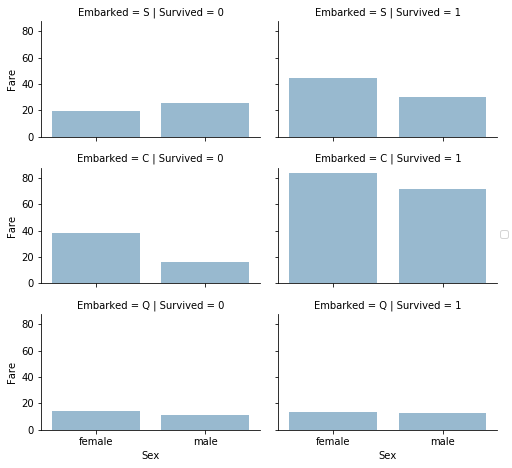

In [15]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## 数据处理

- Wrangle data  
    收集了关于的数据集和解决方案要求的一些假设和决定。不必为了达到这些目的而改变单个特征或值。
- 通过删除特征来修正
    - 这是一个很好的执行起始目标。通过删除功能，处理的数据点更少。加快的笔记本并简化分析。 
    - 根据假设和决定，要放弃Cabin（更正2）和Ticket（更正1）特征。 
    - 注意，对训练和测试集执行相同操作，以保持一致

In [16]:
print "Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape


Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

- 从现有特征创建新特征
    从Name特征来提取新的特征：title，并测试title和生存之间的相关性，然后再删除Name和PassengerId特征。 
    在下面的代码中，我们使用正则表达式提取标题特征。正则表达式模式（\w+\.）匹配名称特征中以点号字符结尾的第一个单词。 expand = False标志返回一个DataFrame。 
- 观察。 
    - 当我们绘制title，Age, Survived时，注意到以下观察结果。 
    - Most titles band Age groups accurately. 例如：主title的年龄平均为5年。 
    - title中的生存年龄段略有不同。 
    - 某些title大部分存活下来（Mme，Lady，Sir）或者没有存活下来（Don，Rev，Jonkheer）。 
- 决定。  
    - 保留模型训练的新title特征

In [17]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex']) #交叉表是用于统计分组频率的特殊透视表  按Title分组，统计各个分组中Sex的频数

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
#crosstab  透视表  统计个数
a111 = np.arange(10)  
b111 = np.arange(10,20)  
date111 = pd.date_range('2016-8-26', periods = 10)  
df1110 = pd.DataFrame({'date': date111, 'SecName':'sec1', 'price': a111*2})
df1111 = pd.DataFrame({'date': date111, 'SecName':'sec1', 'price': a111})
df1112 = pd.DataFrame({'date': date111, 'SecName':'sec2', 'price': b111})  
df111 = pd.concat([df1110,df1111,df1112], axis = 0) #将两个数据框按行拼接  
df1 = pd.crosstab(df111['date'], df111['SecName']) # 第一个参数是指定index，第二个参数是指定column  
print df1
print '-'*40
df2 = pd.crosstab(df111['date'], df111['SecName'],values=df111['price'],aggfunc=sum)  #第三，四个参数 values，aggfun=sum，这里表示将对应的值求和
print df2


SecName     sec1  sec2
date                  
2016-08-26     2     1
2016-08-27     2     1
2016-08-28     2     1
2016-08-29     2     1
2016-08-30     2     1
2016-08-31     2     1
2016-09-01     2     1
2016-09-02     2     1
2016-09-03     2     1
2016-09-04     2     1
----------------------------------------
SecName     sec1  sec2
date                  
2016-08-26     0    10
2016-08-27     3    11
2016-08-28     6    12
2016-08-29     9    13
2016-08-30    12    14
2016-08-31    15    15
2016-09-01    18    16
2016-09-02    21    17
2016-09-03    24    18
2016-09-04    27    19


In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


 - 可以将分类title转换为序号

In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


- 删除name和passengerID

In [21]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

- 转换分类特征
    - 将包含字符串的特征转换为数字值。这是大多数模型算法所要求的。这样做也将帮助我们实现功能完成目标。 
    - 首先将Sex功能转换为名为Gender的新功能，其中female = 1和male = 0。

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


- 完成一个数字连续特征
- 估计和完成缺少或空值的特征。首先为Age特征进行处理。 
- 考虑三种方法来完成一个数值连续的特征。 
    - 简单的方法是在均值和标准差之间生成随机数。 
    - 更准确地猜测缺失值的方法是使用其他相关特征。在我们的案例中，我们注意到年龄，性别和Pclass之间的相关性。使用Pclass和Gender特征组合中Age的中位数值猜测年龄值。因此，Pclass = 1和Gender = 0，Pclass = 1和Gender = 1的年龄中位数等等...... 
    - 联合方法1和2.因此，不是基于中位数猜测年龄值，而是使用平均值之间的随机数和标准偏差，基于Pclass和性别组合。 
- 方法1和3将在我们的模型中引入随机噪声。多次执行的结果可能会有所不同。我们更喜欢方法2。

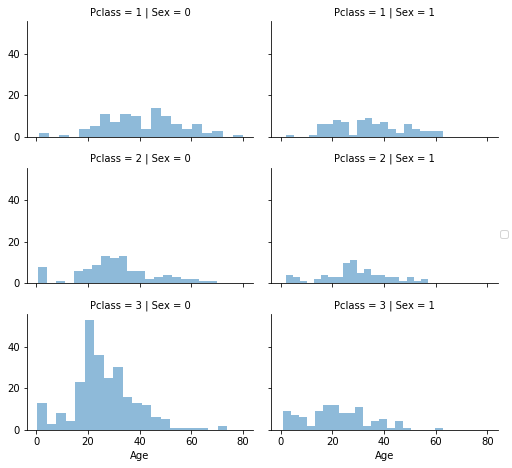

In [23]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

- 开始准备一个空数组，以包含基于Pclass x Gender组合的猜测年龄值。

In [24]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

- 遍历Sex（0或1）和Pclass（1，2，3）来计算6种组合的Age的猜测值（中位数）。

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


- 创建Age bands (年龄段)并确定与Survived的相关性

In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5) #将Age划分为5个区间，返回的是每个值所属的区间
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


- 用基于这些年龄段的序数替换Age（*将Age离散*）

In [27]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


- 结合现有特征创建新特征
    - 我们可以结合Parch和SibSp创建FamilySize特征，从而删除数据集中Parch和SibSp

In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


- 创建另一个特征  IsAlone

In [31]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


- 丢弃 Parch, SibSp, and FamilySize 特征，保留IsAlone特征

In [32]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


- 还可以创建一个结合Pclass和Age的人工特征。

In [33]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


- 完成分类特征
    - 登入特征需要基于登乘港口的S，Q，C值。训练数据集有两个缺失值。只简单填补为最常见的值。

In [34]:
freq_port = train_df.Embarked.dropna().mode()[0] #mode()  众数
freq_port

'S'

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port) #用众数freq_port填补缺失值
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


- 将分类特征转换为数字
    - 现在可以通过创建新的数字港口特征来转换EmbarkedFill特征。

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


- 快速完成并转换数字特征
    - 在测试数据集使用模型为单个缺失值完成Fare特征，以获取此特征最常出现的值。在一行代码中执行此操作。 
    - 注意，由于我们只替换单个值，因此我们不会创建中间新特征或对相关性进行任何进一步分析以猜测丢失的特征。完成目标达到了模型算法对非空值操作的期望要求。 
    - 希望将票价四舍五入到小数点后两位，因为它代表货币。 

In [37]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


- 价格段

In [38]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


- 根据FareBand将票价特征转换为序数值（离散）

In [39]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [40]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## 模型，预测和求解

- 准备好训练模型并预测所需的解决方案。有60多种预测建模算法可供选择。必须了解问题类型和解决方案要求，以便缩小到我们可以评估的少数几个模型。我们的问题是分类和回归问题。想要确定输出（生存与否）与其他变量或特征（性别，年龄，端口...）之间的关系。使用给定的数据集来训练模型，为监督学习。有了这两个标准 - 监督学习加分类和回归，可以将模型选择缩小到几个。这些包括：
    - Logistic回归
    - KNN或k-最近邻
    - 支持向量机
    - 朴素贝叶斯分类
    - 决策树
    - 随机森林 
    - Perceptron 
    - 人工神经网络
    - RVM或相关向量机


In [41]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891L,), (418, 8))

- **Logistic回归**

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

- 我们可以使用Logistic回归来验证我们对特征创建和完成目标的假设和决策。这可以通过计算决策函数中的特征的系数来完成。 
- （相关系数）正系数增加了响应的对数几率（从而增加了概率），负系数降低了响应的对数几率（从而降低了概率）。 
    - Sex是最高的positivie 系数，意味着Sex值增加（男性：0到女性：1），生存率= 1的概率增加最多。 
    - 随着Pclass的增加，Survived = 1的概率减少最多。 
    - 这种方式Age * Class是一个很好的人造特征，因为它与Survived具有次高的负相关性。 
    - Title是第二高的正相关。

In [43]:
coeff_df = pd.DataFrame(train_df.columns.delete(0)) #删除Survived
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287163
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311200
0,Pclass,-0.749007


In [44]:
train_df.columns

Index([u'Survived', u'Pclass', u'Sex', u'Age', u'Fare', u'Embarked', u'Title',
       u'IsAlone', u'Age*Class'],
      dtype='object')

- 使用支持向量机进行建模
- 注意，该模型置信度分数( confidence score)高于logistics回归模型

In [45]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.84

- 在模式识别中，k-最近邻居算法（简称k-NN）是一种用于分类和回归的非参数方法。一个样本通过邻居的多数投票进行分类，样本被分配到k个最近邻居中最常见的类别（k是一个正整数，通常很小）。如果k = 1，则将该对象简单地分配给该单个最近邻居的类别。
    - KNN置信度比logistics回归好，但比SVM差。

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

- 在机器学习中，朴素贝叶斯分类器是一组简单的概率分类器，它基于应用贝叶斯定理和特征之间强大（朴素）的独立性假设。朴素贝叶斯分类器具有高度可扩展性，在学习问题中需要许多变量（特征）的线性参数。
    - 模型生成的置信度评分是目前评估的模型中最低的。

In [47]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

- 感知器是用于二元分类器的监督学习的算法（可以决定输入由数字向量表示的属于某个特定类别的函数）。它是一种线性分类器，即一种分类算法，它基于将一组权重与特征向量相结合的线性预测函数进行预测。该算法允许在线学习，因为它一次处理训练集中的元素。

In [48]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

D:\Program Files\Anaconda3\envs\py27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.0

In [49]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.01

In [50]:
#  随机梯度下降
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

D:\Program Files\Anaconda3\envs\py27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


74.64

- 使用决策树作为预测模型，将特征（树分支）映射为关于目标值（树叶）的结论。目标变量可以采用有限的一组值的树模型称为分类树;在这些树结构中，叶代表类标签，分支代表导致这些类标签的功能的连接。目标变量可以采用连续值（通常是实数）的决策树被称为回归树。
    - 模型可信度评分是目前评估的模型中最高的

In [51]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

- 随机森林。随机森林或随机决策森林是一种用于分类，回归和其他任务的集合学习方法，它通过在训练时构造大量决策树（n_estimators = 100）并输出作为类的模式的类（分类）或者意味着预测（回归）单个树木 
    - 模型可信度评分是目前评估的模型中最高的。决定使用这个模型的输出（Y_pred）来创建竞赛结果提交。

In [52]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

- 模型评估
现在可以评估所有模型，以选择最适合问题的模型。虽然决策树和随机森林评分都相同，但我们选择使用随机森林来纠正决策树过度拟合其训练集的习惯。

In [53]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.01
5,Perceptron,78.00
6,Stochastic Gradient Decent,74.64
4,Naive Bayes,72.28


In [56]:
def mkdir(path):
    # 引入模块
    import os
 
    # 去除首位空格
    path=path.strip()
    # 去除尾部 \ 符号
    path=path.rstrip("\\")
 
    # 判断路径是否存在
    # 存在     True
    # 不存在   False
    isExists=os.path.exists(path)
 
    # 判断结果
    if not isExists:
        # 如果不存在则创建目录
        # 创建目录操作函数
        os.makedirs(path) 
 
        print path+' 创建成功'
        return True
    else:
        # 如果目录存在则不创建，并提示目录已存在
        print path+' 目录已存在'
        return False


In [57]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
mkdir(".//output")
submission.to_csv('./output/submission.csv', index=False)

.//output 创建成功


以上参考自 https://www.kaggle.com/startupsci/titanic-data-science-solutions